# Fundamentos Matemáticos

# Problema 1: Estimación de $\pi$
Estimar el valor de $\pi$ utilizando el método Monte Carlo para simular la distribución aleatoria de puntos sobre
una superficie 40 cm $\times$ 80 cm en la que se situan un sección cuadrada de lado **a** y una sección circular de radio
**a**. Las secciones deben ser disjuntas.


## Método Monte Carlo
### Situación
Nos encontramos ante una superficie de *40 cm $\times$ 80 cm* en la que se sitúan una sección cuadrada de lado *a* y una sección circular de radio *a*. Sobre esta superficie se generarán *puntos con coordenadas aleatorias*, pudiendo situarse dentro de cualquiera de las dos secciones. **El experimento consiste en aproximar el valor de $\pi$** teniendo en cuenta la cantidad de puntos que se sitúan dentro de cada figura.

Esta aproximación se obtiene a partir de la relación que existe entre el *área* de ambas figuras.

### 1. $ {Ac} = {\pi a^2} $
### 2. $ {As} = {a^2} $
### 3. $ \frac{Ac}{As} = \frac{\pi a^2}{a^2} = \pi $

En este experimento, estimaremos el área del círculo (*Ac*) y el área del cuadrado (*As*) en base a la cantidad de puntos que se sitúen dentro de cualquiera de las dos figuras. Por tanto, **la aproximación de $\pi$ la obtenemos gracias al cociente de la siguiente división**:

### $ \pi \approx \frac{Número\;de\;puntos\;en\;el\;círculo}{Número\;de\;puntos\;en\;el\;cuadrado} $



### 1) Parámetros relevantes del experimento:
- Dimensiones de la superficie: _40cm $\times$ 80cm_.
- Tamaño de las figuras, determinado por _a_.
- Posición de cada punto sobre la superficie: _coordenadas x e y_.

Con el fin de obtener una mayor precisión en los resultados, debemos interpretar las coordenadas como **variables continuas**, de tal forma que puedan tomar cualquier valor en un rango definido:
- El rango que abarca la variable _x_ es un valor continuo en el intervalo de _0cm a 80cm_.
- El rango que abarca la variable _y_ es un valor continuo en el intervalo de _0cm a 40cm_.

El parámetro fijo _a_ no tiene un valor estipulado, para una primera aproximación le daremos el valor de _a = 15_.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle
from IPython.display import HTML

In [24]:
# Dimensiones del tablero
anchura_superficie = 80
altura_superficie = 40

# Establecemos unos valores predeterminados para 'a' y el centro de las figuras
a_pred = 15
c_circ_pred = (3 * (anchura_superficie / 4), altura_superficie / 2)
c_cuad_pred = (anchura_superficie / 4, altura_superficie / 2)

Establecidos los parámetros del experimento, visualicemos el entorno del ejercicio:

In [21]:
def obtener_anclaje (centro_cuadrado, a):
    """Obtiene las coordenadas de la esquina inferior izquierda del cuadrado.

    Esta función obtiene el anclaje del cuadrado en base a las coordenadas
    de su centro para facilitar su impresión.

    Args:
        centro (tuple(float, float), Default: (20.0, 20.0)): coordenadas de la posición del centro del cuadrado
        a (float, Default: 20.0) : tamaño del radio del círculo

    Returns:
        Una tupla de floats con las coordenadas de la esquina inferior izquierda del cuadrado
    """
    x_centro, y_centro = centro_cuadrado

    x_anclaje = x_centro - (a / 2)
    y_anclaje = y_centro - (a / 2)

    return (x_anclaje, y_anclaje)

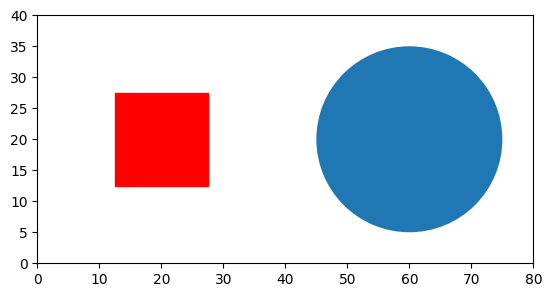

In [40]:
fig, ax = plt.subplots()
ax.set_ylim(0, altura_superficie)
ax.set_xlim(0, anchura_superficie)
ax.set_aspect( 1 )
ax.add_patch(plt.Circle(c_circ_pred, a_pred))
ax.add_patch(Rectangle(obtener_anclaje(c_cuad_pred, a_pred), a_pred, a_pred, color='red'))
plt.show()

### 2) Identificar las distribuciones de probabilidad de cada parámetro
El parámetro que se ve afectado por la aleatoriedad en este experimento es la posición en la que se genera cada punto sobre la superficie. Es decir, **las _coordenadas x e y_** de cada punto.

Puesto que, tanto para _x_ como para _y_ todos los valores dentro del rango definido son equiprobables, nos hallamos ante un caso de **distribución uniforme**. 

### 3) Obtener muestras aleatorias de las distribuciones.
El siguiente paso será obtener muestras aleatorias de las distribuciones, es decir, generar puntos sobre la superficie del entorno con coordenadas _(x, y)_ aleatorias, siguiendo una distribución uniforme.

Para ello, hemos definido la función *generar_puntos*.

In [3]:
# Definimos el generador de números pseudoaleatorios
rng = np.random.default_rng()

In [4]:
def generar_puntos(numero_muestras, rng):
    """Genera un número determinado de puntos aleatorios.

    Esta función genera puntos con coordenadas x e y aleatorias.
    Los valores de X son numeros reales entre 0 y 80 (la anchura de la superficie).
    Los valores de Y son números reales entre 0 y 40 (la altura de la superficie).
    Finalmente, guarda todos los puntos generados en un array

    Args:
        numero_muestras (int) : Cantidad de puntos a generar.
        rng (Generator) : Generador de números pseudoaleatorios de numpy.

    Returns:
        Un array de dimensiones (numero_muestras, 2). Cada fila es una coordenada (x,y)
        de números de coma flotante
    """
    
    return np.array([(rng.uniform(0, anchura_superficie), rng.uniform(0, altura_superficie)) for n in range(numero_muestras)])

Ejemplo de uso:

In [62]:
N_muestras = 4
puntos = generar_puntos(N_muestras, rng)
print(f"se han generado {N_muestras} puntos con las siguientes coordenadas:")
for i in range(N_muestras):
    print(f"(x = {puntos[i][0]:.2f}, y = {puntos[i][1]:.2f})")


se han generado 4 puntos con las siguientes coordenadas:
(x = 14.96, y = 39.98)
(x = 57.28, y = 16.29)
(x = 2.81, y = 15.85)
(x = 28.05, y = 14.10)


### 4) Realizar la simulación para cada una de las muestras.
Una vez hemos generado los puntos sobre la superficie, es el momento de comprobar dónde se sitúan.

En nuestro experimento, queremos cuantificar los puntos que se sitúan dentro de cualquiera de las dos figuras. Para comprobar esto, hemos definido dos funciones: *dentro_circulo* y *dentro_cuadrado*.

In [29]:
def dentro_circulo(coordenadas, centro = c_circ_pred, a = a_pred):
    """Determina si unas coordenadas se encuentran dentro del
    área del círculo.

    Esta función analiza las coordenadas X e Y de un punto y el
    área del círculo en base a sus dimensiones y su posición en la
    superficie del experimento.

    Args:
        coordenadas ([float, float]) : coordenadas del punto a analizar.
        centro (tuple(float, float), Default: (60.0, 20.0)): coordenadas de la posición del centro del círculo
        a (float, Default: 20.0) : tamaño del radio del círculo

    Returns:
        Valor booleano que determina si el punto se encuentra dentro
        del área del círculo
    """
    x, y = coordenadas

    x_circulo, y_circulo = centro
    distancia_a_coordenada = (x - x_circulo)**2 + (y - y_circulo)**2

    return (distancia_a_coordenada < a**2)

Ejemplo de uso:

La coordenada (14.96, 39.98) no se encuentra dentro del círculo.


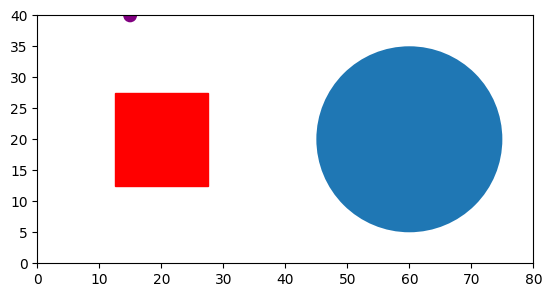

In [69]:
rand_i = np.random.randint(0,N_muestras)

if dentro_circulo(puntos[rand_i]):
    print(f"La coordenada ({puntos[rand_i][0]:.2f}, {puntos[rand_i][1]:.2f}) se encuentra dentro del círculo.")
else:
    print(f"La coordenada ({puntos[rand_i][0]:.2f}, {puntos[rand_i][1]:.2f}) no se encuentra dentro del círculo.")

fig, ax = plt.subplots()
ax.set_ylim(0, altura_superficie)
ax.set_xlim(0, anchura_superficie)
ax.set_aspect( 1 )
ax.add_patch(plt.Circle(c_circ_pred, a_pred))
ax.add_patch(Rectangle(obtener_anclaje(c_cuad_pred, a_pred), a_pred, a_pred, color='red'))
ax.add_patch(plt.Circle((puntos[rand_i][0],puntos[rand_i][1]),1, color="purple"))
plt.show()

In [52]:
def dentro_cuadrado(coordenadas, centro = c_cuad_pred, a = a_pred):
    """Determina si unas coordenadas se encuentran dentro del
    área del cuadrado.

    Esta función analiza las coordenadas X e Y de un punto y el
    área del cuadrado en base a sus dimensiones y su posición en la
    superficie del experimento.

    Args:
        coordenadas ([float, float]) : coordenadas del punto a analizar.
        centro (tuple(float, float), Default: (20.0, 20.0)): coordenadas de la posición del centro del cuadrado
        a (float, Default: 20.0) : tamaño del lado del cuadrado

    Returns:
        Valor booleano que determina si el punto se encuentra dentro
        del área del cuadrado
    """
    x, y = coordenadas

    x_cuadrado, y_cuadrado = centro
    x_lim_inf = x_cuadrado - (a / 2)
    x_lim_sup = x_cuadrado + (a / 2)
    y_lim_inf = y_cuadrado - (a / 2)
    y_lim_sup = y_cuadrado + (a / 2)

    return (x_lim_inf < x < x_lim_sup) and (y_lim_inf < y < y_lim_sup)

Ejemplo de uso:

La coordenada (28.05, 14.10) no se encuentra dentro del cuadrado.


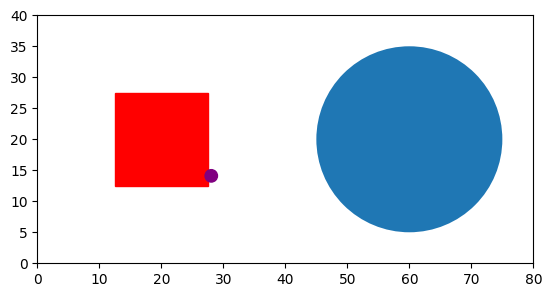

In [70]:
rand_i = np.random.randint(0,N_muestras)

if dentro_cuadrado(puntos[rand_i]):
    print(f"La coordenada ({puntos[rand_i][0]:.2f}, {puntos[rand_i][1]:.2f}) se encuentra dentro del cuadrado.")
else:
    print(f"La coordenada ({puntos[rand_i][0]:.2f}, {puntos[rand_i][1]:.2f}) no se encuentra dentro del cuadrado.")

fig, ax = plt.subplots()
ax.set_ylim(0, altura_superficie)
ax.set_xlim(0, anchura_superficie)
ax.set_aspect( 1 )
ax.add_patch(plt.Circle(c_circ_pred, a_pred))
ax.add_patch(Rectangle(obtener_anclaje(c_cuad_pred, a_pred), a_pred, a_pred, color='red'))
ax.add_patch(plt.Circle((puntos[rand_i][0],puntos[rand_i][1]),1, color="purple"))
plt.show()


Finalmente, dadas las coordenadas de un punto, comprobaremos si se sitúan dentro de alguna de nuestras figuras y lo reflejaremos cuantitativamente:
- Si el punto se sitúa dentro de la figura, le asignaremos el valor 1.
- Si el punto NO se sitúa dentro de la figura, le asignaremos el valor 0.

Para esto, hemos definido la función *realizar_simulación*. Este proceso debemos llevarlo a cabo para cada una de las muestras que hemos generado en el apartado anterior.

In [7]:
def realizar_simulacion(puntos, c_circ = c_circ_pred, c_cuad = c_cuad_pred, a = a_pred):
    """Determina en qué figura ha caído cada uno de los puntos generados

    Esta función obtiene el resultado de comprobar en dónde ha caído cada
    uno de los puntos generados. Para cada figura, guarda un 1 si el punto
    ha caído dentro, un 0 en caso contrario.

    Args:
        puntos (ndarray(dtype=float, ndim=2)) : array de puntos generados
        c_circ (tuple(float, float), Default: (60.0, 20.0)): coordenadas de la posición del centro del círculo
        c_cuad (tuple(float, float), Default: (20.0, 20.0)): coordenadas de la posición del centro del cuadrado
        a (float, Default: 20.0) : tamaño de las figuras

    Returns:
        Array de números enteros de dos dimensiones. El primer número de cada fila (0,1) determina si el punto
        está dentro del círculo. El segundo número (0,1), si está dentro del cuadrado.
    """    
    return np.array([(int(dentro_circulo(n, c_circ, a)), int(dentro_cuadrado(n, c_cuad, a))) for n in puntos])


Ejemplo de uso:

In [75]:
resultado_simulacion = realizar_simulacion(puntos)

print("Los resultados de la simulación son: ")
for i in resultado_simulacion:
    print(f"{i[0]} puntos en el círculo - {i[1]} puntos en el cuadrado")

Los resultados de la simulación son: 
0 puntos en el círculo - 0 puntos en el cuadrado
1 puntos en el círculo - 0 puntos en el cuadrado
0 puntos en el círculo - 0 puntos en el cuadrado
0 puntos en el círculo - 1 puntos en el cuadrado


### Repetir el proceso
Llegados a este punto, hemos realizado el experimento, habiendo obtenido las muestras aleatorias y realizando la simulación para cada una de ellas. Ahora podríamos analizar los resultados obtenidos, pero para obtener una mejor comprensión de éstos, resulta conveniente repetir el experimento varias veces.

Para ello, hemos definido la función *repetir_experimento*, que llevará a cabo la obtención de muestras y su simulación el número de veces que creamos conveniente para obtener resultados representativos.

In [8]:
def repetir_experimento(num_muestras, num_reps, rng, c_circ = c_circ_pred, c_cuad = c_cuad_pred, a = a_pred):
    """Repite la simulación de una cantidad de puntos y guarda los resultados

    Esta función genera todos los puntos aleatorios necesarios para el experimento.
    Después, realiza tantas simulaciones como indique num_reps utilizando num_muestras
    en cada una. Finalmente, guarda todos los resultados por separado en un array.

    Args:
        num_muestras (int) : cantidad de puntos por simulación
        num_reps (int) : cantidad de veces a repetir el experimento
        rng (Generator) : generador de números pseudoaleatorios de numpy
        c_circ (tuple(float, float), Default: (60.0, 20.0)): coordenadas de la posición del centro del círculo
        c_cuad (tuple(float, float), Default: (20.0, 20.0)): coordenadas de la posición del centro del cuadrado
        a (float, Default: 20.0) : tamaño de las figuras

    Returns:
        Array de números enteros de dos dimensiones. 
        El primer número de cada fila son los puntos que han caído en el círculo en cada experimento.
        El segundo número de cada fila son los puntos que han caído en el cuadrado en cada experimento.
    """    
    # Generamos suficientes muestras para todas las repeticiones
    puntos_generados = generar_puntos(num_muestras * num_reps, rng)

    # Realizamos num_reps simulaciones, cada simulación con n_muestras
    resultados = np.array([realizar_simulacion(puntos_generados[n*num_muestras:(n+1)*num_muestras], c_circ, c_cuad, a) for n in range(num_reps)])

    # Para cada resultado del experimento, sumamos la cantidad de puntos en cada figura
    suma_puntos = np.array([[resultados[n][:,0].sum(), resultados[n][:,1].sum()] for n in range(num_reps)])

    return suma_puntos

Ejemplo de uso:

In [80]:
N_muestras = 1000
N_repeticiones = 100

resultados = repetir_experimento(N_muestras, N_repeticiones, rng)
print(f"Del total de los {N_muestras} puntos generados para el primer experimento, han caído:")
print(f"{resultados[0][0]} puntos en el círculo.")
print(f"{resultados[0][1]} puntos en el cuadrado.")

Del total de los 1000 puntos generados para el primer experimento, han caído:
402 puntos en el círculo.
116 puntos en el cuadrado.


### 5) Analizar los resultados
Hemos repetido el experimento 100 veces, simulando un total de 100.000 muestras (*Número de muestras $\times$ Número de repeticiones*). Ahora sólo nos queda comprobar la proporción de puntos que han caído en el círculo respecto a los que han caído en el cuadrado. De esta manera, obtendremos la aproximación de $\pi$.

Por el momento, obtendremos la aproximación de $\pi$ de cada experimento por separado. Para ello, hemos definido la función *aproximar_pi_separado*.

In [9]:
def aproximar_pi_separado (num_muestras, num_reps, rng, c_circ = c_circ_pred, c_cuad = c_cuad_pred, a = a_pred):
    """Aproxima PI para cada experimento realizado

    Esta función obtiene los resultados de los experimentos por separado
    y realiza la aproximación de PI para cada uno de ellos

    Args:
        num_muestras (int) : cantidad de puntos por simulación
        num_reps (int) : cantidad de veces a repetir el experimento
        rng (Generator) : generador de números pseudoaleatorios de numpy
        c_circ (tuple(float, float), Default: (60.0, 20.0)): coordenadas de la posición del centro del círculo
        c_cuad (tuple(float, float), Default: (20.0, 20.0)): coordenadas de la posición del centro del cuadrado
        a (float, Default: 20.0) : tamaño de las figuras

    Returns:
        Array de floats que contienen la aproximación obtenida en cada experimento
    """ 
    puntos_resultado = repetir_experimento(num_muestras, num_reps, rng, c_circ, c_cuad, a)
    aprox_pi = np.zeros(num_reps)

    for n in range(num_reps): # Para cada experimento

        if puntos_resultado[n][1] == 0: # Si no han caído puntos en el cuadrado, evitamos la división entre cero
            aprox_pi[n] = 0
        else:
            aprox_pi[n] = puntos_resultado[n][0]/puntos_resultado[n][1]

    return aprox_pi

Ejemplo de uso:

In [82]:
N_muestras = 1000
N_repeticiones = 100

aproximaciones = aproximar_pi_separado(N_muestras, N_repeticiones, rng)
print(f"Las aproximaciones de Pi de los tres primeros experimentos son:")
print(f"1.- {aproximaciones[0]}")
print(f"2.- {aproximaciones[1]}")
print(f"3.- {aproximaciones[2]}")


Las aproximaciones de Pi de los tres primeros experimentos son:
1.- 2.8043478260869565
2.- 3.427350427350427
3.- 3.892156862745098


Para analizar el resultado del total de experimentos que hemos realizado, debemos calcular la media de los resultados de cada experimento individual:

In [84]:
print(f"La aproximación media de Pi de los {N_repeticiones} experimentos realizados, cada uno con {N_muestras} muestras es: {aproximaciones.mean()}")

La aproximación media de Pi de los 100 experimentos realizados, cada uno con 1000 muestras es: 3.1849468526570455


# 1. Analizar la distribución resultante

In [10]:
def aproximar_pi_pregenerados (puntos_generados, c_circ = c_circ_pred, c_cuad = c_cuad_pred, a = a_pred):
    """Aproxima PI utilizando puntos pregenerados.

    Esta función utiliza puntos pregenerados para realizar una aproximacion de Pi.
    Su uso principal es para la generación de gráficos que necesiten realizar muchas
    veces estas operaciones, evitando generar nuevas coordenadas cada vez

    Args:
        puntos_generados (ndarray(dtype=float, ndim=2)) : array de puntos generados
        c_circ (tuple(float, float), Default: (60.0, 20.0)): coordenadas de la posición del centro del círculo
        c_cuad (tuple(float, float), Default: (20.0, 20.0)): coordenadas de la posición del centro del cuadrado
        a (float, Default: 20.0) : tamaño de las figuras

    Returns:
        Float con la aproximación de PI del experimento
    """ 

    # Realizamos num_reps simulaciones, cada simulación con n_muestras
    puntos_resultado = realizar_simulacion(puntos_generados, c_circ, c_cuad, a)

    puntos_circulo  = puntos_resultado[:,0].sum()
    puntos_cuadrado = puntos_resultado[:,1].sum()

    if puntos_cuadrado == 0:
        return 0
    else:
        return puntos_circulo/puntos_cuadrado

# 2) Estudiar el efecto del parámetro fijo _a_

Es intuitivo que, a mayor tamaño de las figuras, mayor probabilidad de que más puntos caigan en una de las dos figuras y por tanto nuestra estimación de $\pi$ sea mejor.

Los primeros experimentos los hemos realizado estableciendo _a_ como la mitad de la altura de la superficie. Esto se debe a que es el mayor valor que podemos establecer de radio del círculo y que se mantenga dentro de la superficie.

El porcentaje de los puntos generado dentro de las figuras es representativo del área que abarcan en el tablero del experimento.\
Para corroborarlo, calculemos qué porcentaje del área total del tablero abarcan las figuras cuando _a_=20.

In [12]:
def porcentaje_puntos_en_figura (puntos_generados, c_circ = c_circ_pred, c_cuad = c_cuad_pred, a = a_pred):
    """Obtiene el porcentaje de puntos que han caído dentro de las secciones
    circular y cuadrada

    Esta función utiliza puntos pregenerados y calcula el porcentaje de ellos
    que han caído dentro de las secciones circular y cuadrada.

    Args:
        puntos_generados (ndarray(dtype=float, ndim=2)) : array de puntos generados
        c_circ (tuple(float, float), Default: (60.0, 20.0)): coordenadas de la posición del centro del círculo
        c_cuad (tuple(float, float), Default: (20.0, 20.0)): coordenadas de la posición del centro del cuadrado
        a (float, Default: 20.0) : tamaño de las figuras

    Returns:
        Float con el porcentaje de puntos que han caído en las figuras
    """ 

    # Realizamos num_reps simulaciones, cada simulación con n_muestras
    puntos_resultado = realizar_simulacion(puntos_generados, c_circ, c_cuad, a)

    return puntos_resultado.sum() / len(puntos_generados)

Por tanto, resulta interesante estudiar la **relación** entre estos dos datos: el tamaño de _a_ y el porcentaje de puntos que caen dentro de las figuras.\
También es interesante visualizar cómo el aumento del tamaño de _a_ afecta a las estimaciones de $\pi$ que obtenemos.

In [13]:
# Referencias: https://matplotlib.org/stable/users/explain/axes/arranging_axes.html
fig = plt.figure(figsize=(16, 8), layout="constrained")
spec = fig.add_gridspec(2, 2)

ax4 = fig.add_subplot(spec[0, :])
ax5 = fig.add_subplot(spec[1, 0])
ax6 = fig.add_subplot(spec[1, 1])

# Generamos las muestras
N_muestras = int(1e4)
puntos = generar_puntos(N_muestras, rng)

# En el eje X, el tamaño de a predeterminado ( a = 20 )
x = np.arange(1, a_pred, 1)

# En el eje Y de la primera figura, el porcentaje de puntos que caen dentro de las figuras para cada X
y1 = np.array([np.array(porcentaje_puntos_en_figura(puntos, a=a)) for a in x])
# En el eje Y de la segunda figura, la aproximación de Pi obtenida para cada tamaño de a
y2 = np.array([np.array(aproximar_pi_pregenerados(puntos, a=a)) for a in x])

# Solo 'ploteamos' una vez las gráficas, después actualizaremos sus valores en la animación
ln3, = ax5.plot(x, y1, c="steelblue")
ln4, = ax6.plot(x, y2, c="steelblue")

# Figuras
# Referencias: https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Patch.html
#              https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html
plot_cuadrado = Rectangle(obtener_anclaje(c_cuad_pred, a_pred), a_pred, a_pred, color='red')
plot_circulo = plt.Circle(c_circ_pred, a_pred)

def init_environment():
    ax4.set_ylim(0, 40)
    ax4.set_xlim(0, 80)
    ax4.set_aspect(1)
    ax4.add_patch(plot_circulo)
    ax4.add_patch(plot_cuadrado)

    ax5.set_xlabel("Tamaño del parámetro a (cm)")
    ax5.set_ylim(0.0, 1.0)
    ax5.set_ylabel("Porcentaje de puntos que caen dentro de figuras")
    ax5.set_title("Aumento de puntos dentro de figuras")

    ax6.set_xlabel("Tamaño del parámetro a (cm)")
    ax6.set_ylabel("Valor de aproximación de Pi obtenido")
    ax6.set_ylim(np.pi - 0.2, np.pi + 0.2)
    ax6.axhline(y = np.pi, c="firebrick", linestyle="--")
    ax6.set_title("Mejora de la aproximación de Pi")

    plt.show()

def update_environment(frame):
    ln3.set_data(x[:frame+1], y1[:frame+1])
    ln4.set_data(x[:frame+1], y2[:frame+1])
    plot_cuadrado.set_height(frame)
    plot_cuadrado.set_width(frame)
    plot_circulo.set_radius(frame)

ani = FuncAnimation(fig, update_environment, frames=np.arange(x.size), init_func=init_environment)
plt.close()
HTML(ani.to_jshtml())

# 3) ¿Qué ocurrirá si las secciones no son disjuntas?

Dado que en el apartado anterior hemos concluido que, a mayor tamaño de *a*, mejor es la aproximación de $\pi$ que obtenemos usando el mismo número de muestras, para este apartado utilizaremos el valor de *a = 20*.

In [90]:
a_disjuntas = 20


La completa aleatoriedad bajo la que se generan las coordenadas de los puntos a analizar, nos asegura que la distribución de éstos por la superficie tiende a la uniformidad.

Como nuestra aproximación de $\pi$ parte de contabilizar los puntos que se sitúan dentro de estas figuras, podemos considerar que cualquier punto que no contribuya para ninguna de las dos figuras resulta **insignificante**.

Por tanto, como mencionamos en el apartado anterior, resulta interesante maximizar el área que abarcan las figuras en la superficie del experimento. Para ello, establecimos el tamaño máximo para ambas figuras y, en un principio, _las situamos separadas una de la otra_.

El **solapamiento** del área de ambas figuras crea una situación en la cual el *porcentaje* de área total de la superficie que éstas abarcan, decrece progresivamente. 

Al mismo tiempo, a medida que ambas figuras se juntan, el **área de solapamiento** crece de manera proporcional.

Cualquier punto que se sitúe dentro de este área, nos aportará **el doble de información** que un punto que solo se sitúe en una de las dos figuras, ya que cuenta positivamente para ambas.

Puesto que, la relación que existe entre el *porcentaje total* del área que abarcan las figuras y el *área de solapamiento* de ambas es *directamente proporcional*, **los resultados no deberían verse alterados por la posición de las figuras en la superficie**.

Para corroborarlo, estudiaremos la aproximación de $\pi$ para diferentes posiciones de las figuras, e iremos moviendo el cuadrado hasta que esté completamente contenido en el círculo.

El escenario inicial será el de las figuras totalmente disjuntas y realizaremos una aproximación de $\pi$ para cada centímetro que movamos el cuadrado a la izquierda, hasta que el centro de ambas figuras se sitúe en el mismo punto.

Para cada aproximación de $\pi$ utilizaremos *1.000.000* de muestras, que generaremos una sola vez y utilizaremos para todas las aproximaciones. De esta manera, reducimos el coste computacional del experimento.

In [91]:
# Generamos las coordenadas solo una vez y analizamos los resultados con diferente número de muestras
N_muestras = int(1e6)
puntos = generar_puntos(N_muestras, rng)# Generamos las coordenadas solo una vez y analizamos los resultados con diferente número de muestras

In [92]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

pos_inicial_cuadrado = (c_cuad_pred[0]+5, c_cuad_pred[1])

# Movemos el centro del cuadrado en el eje X hasta llegar al centro del círculo
posicion_cuadrado = np.array([(pos_inicial_cuadrado[0] + n, pos_inicial_cuadrado[1]) for n in range(int(c_circ_pred[0] - c_cuad_pred[0]))])

# Establecemos la actualización del gráfico
posicion_x_cuadrado = np.arange(pos_inicial_cuadrado[0], c_circ_pred[0], 1)

# Guardamos el cuadrado para actualizarlo en el gráfico según avance a la derecha
plot_cuadrado = Rectangle(obtener_anclaje(pos_inicial_cuadrado, a_disjuntas), a_disjuntas, a_disjuntas, color='red')

y = np.array([np.array(aproximar_pi_pregenerados(puntos, c_cuad=centro, a=a_disjuntas)) for centro in posicion_cuadrado])

def init_enviroment():
    ax1.set_ylim(0, 40)
    ax1.set_xlim(0, 80)
    ax1.set_aspect(1)
    ax1.add_patch(plt.Circle(c_circ_pred, a_disjuntas))
    ax1.add_patch(plot_cuadrado)
    ax2.set_ylim(np.pi - 0.4, np.pi + 0.4)
    ax2.set_xlabel("Posición del centro del cuadrado")
    ax2.set_ylabel("Aproximación de Pi")
    ax2.axhline(y = np.pi, c="firebrick", linestyle="--")
    ax2.set_title("Figuras progresivamente no disjuntas")
    plt.show()

def update_enviroment(frame):
    plot_cuadrado.set_xy(obtener_anclaje(posicion_cuadrado[frame], a_disjuntas))
    ax2.plot(posicion_x_cuadrado[frame-1:frame+1], y[frame-1:frame+1], c="steelblue")


ani = FuncAnimation(fig, update_enviroment, frames=np.arange(posicion_x_cuadrado.size), init_func=init_enviroment)
plt.close()
HTML(ani.to_jshtml())

Como podemos ver, la aproximación de $\pi$ que obtenemos **prácticamente no varía** en base a la posición en la que se encuentre el cuadrado.

Las pequeñas variaciones que existen en los resultados provienen de cómo se han generado los puntos en la superficie, pudiendo acumularse más en ciertas zonas que en otras.

Pero, como las coordenadas de estos puntos son completamente aleatorias, repetir el experimento con otro grupo de muestras similar nos llevaría a la misma conclusión: **la posición de las figuras en la superficie no resulta relevante**.